# Exploration: date tags with daily resolution

#### Date-tag resolution definitions
Based on whether a regex pattern matched on a date-tag
```
year : \d{4}-xx-xx
month : \d{4}-\d{2}-xx
day : \d{4}-\d{2}-\d{2}
broken : none of the above 
```

In [3]:
import re
import ndjson
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import primitives
path_primitives = '../data/primitives_220303/primitives.ndjson'
with open(path_primitives) as fin:
    primitives = ndjson.load(fin)

# import date tags
path_dates = '../data/primitives_220303/df_date.csv'
df_date = pd.read_csv(path_dates)

### Concatenating daily tags to years

In [5]:
# get daily dates
df_date_daily = df_date.query('resolution == "day"')

# summarize date occurances
days = (df_date_daily
    .groupby('date')
    .size()
    .to_frame(name='count')
    .reset_index()
)
# tag unique
days['unique'] = [False if n > 1 else True for n in days['count'].tolist()]

# extract year
days['year'] = [int(re.match(r'\d{4}', tag).group(0)) for tag in days['date'].tolist()]
# get rid of ridiculous dates 
days = days.query('year >= 1400 & year < 1800')

In [6]:
## convert to datetime
## DOESN'T WORK: OUT OF BOUNDS. datetime64 starts in 1677
# dates_datetime = []
# invalid_dates = []
# for tag in days['date'].tolist():
#     try:
#         parsed_tag = pd.to_datetime(tag, format='%Y-%m-%d')
#         dates_datetime.append(parsed_tag)
#     except ValueError:
#         dates_datetime.append(None)
#         invalid_dates.append(tag)

<AxesSubplot:xlabel='year', ylabel='n_dates'>

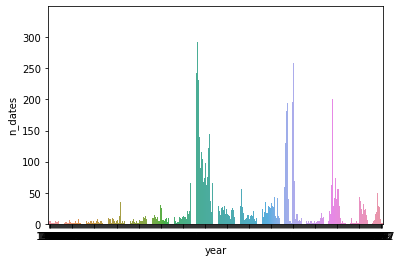

In [11]:
props_unique_yearly = []
for year_tag, year_data in days.groupby('year'):
    n_records = len(year_data)
    proportion_unique = sum(year_data['unique']) / n_records
    props_unique_yearly.append({
        'year': year_tag,
        'n_dates': n_records,
        'proportion_unique': proportion_unique, 
    })

props_unique_yearly = pd.DataFrame(props_unique_yearly)

# plot
sns.barplot(
    x=props_unique_yearly['year'],
    y=props_unique_yearly['n_dates']
)

### Concatenating daily tags to decades
unique vs non-unique date tag density

In [7]:
days['decade'] = [re.match(r'\d{4}', tag).group(0) for tag in days['date'].tolist()]
days['decade'] = [int(year[0:3]) for year in days['decade'].tolist()]

props_unique_decade= []
for decade_tag, decade_data in days.groupby('decade'):
    n_records = len(decade_data)
    proportion_unique = sum(decade_data['unique']) / n_records
    props_unique_decade.append({
        'decade': decade_tag,
        'n_dates': n_records,
        'proportion_unique': proportion_unique, 
    })

props_unique_decade = pd.DataFrame(props_unique_decade)

Text(0.5, 1.0, 'n daily tags per decade')

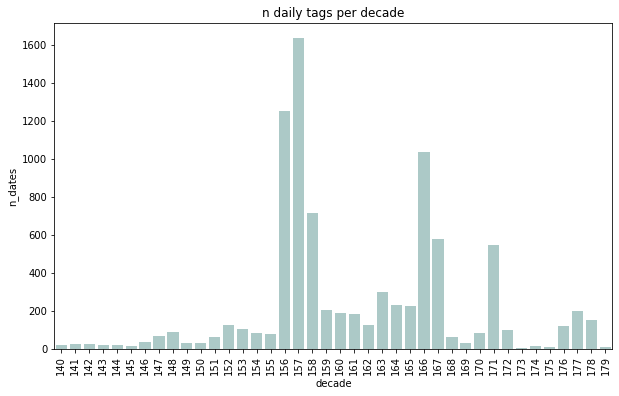

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['n_dates'],
    color='#A7CECB'
)
plt.xticks(rotation=90)
plt.title('n daily tags per decade')

Text(0.5, 1.0, 'proportion of unique daily tags per decade (non-unique in dark)')

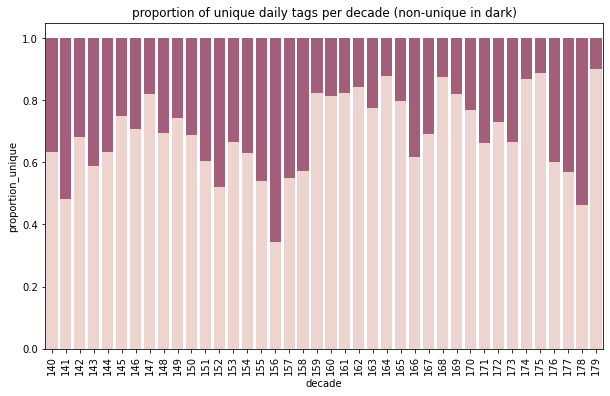

In [9]:
plt.figure(figsize=(10, 6))
props_unique_decade['top'] = 1
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['top'],
    color='#AE5377'
)
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['proportion_unique'],
    color='#F2D1C9'
)
plt.xticks(rotation=90)
plt.title('proportion of unique daily tags per decade (non-unique in dark)')

Text(0.5, 1.0, 'n daily tags + proportion of unique (non-unique in dark)')

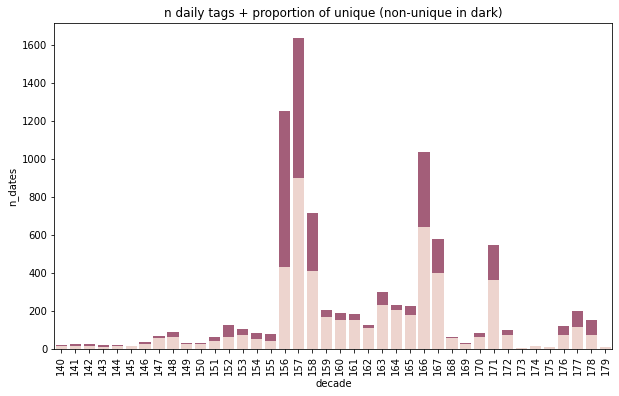

In [10]:
plt.figure(figsize=(10, 6))
props_unique_decade['top'] = 1
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['n_dates'],
    color='#AE5377'
)
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['n_dates'] * props_unique_decade['proportion_unique'],
    color='#F2D1C9'
)
plt.xticks(rotation=90)
plt.title('n daily tags + proportion of unique (non-unique in dark)')